<a href="https://colab.research.google.com/github/minkyeongk/DL_TensorFlow_Developer/blob/main/1.%20Introduction%20to%20TensorFlow%20for%20Artificial%20Intelligence%2C%20Machine%20Learning%2C%20and%20Deep%20Learning/week_4/week_4_notebook1_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2021-01-07 18:18:53--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.9.208, 172.217.164.176, 172.217.2.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.9.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   205MB/s    in 0.7s    

2021-01-07 18:18:54 (205 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [ ]:
import os
import zipfile 

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')   # zipfile 형태로 열어서 
zip_ref.extractall('/tmp/horse-or-human')   # 지정한 위치로 extract 즉 unzip해주는 듯 
zip_ref.close() 

 you'll see something called an ImageGenerator being used -- and this is coded to read images from subdirectories, and automatically label them from the name of that subdirectory. 

 이미지 생성자가 subdirectory에서 이미지를 불러와서 해당 서브 디렉토리 이름으로 자동으로 라벨링 해준다 

In [ ]:
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# 각 디렉토리 안의 파일 이름 10개씩 출력 
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

# 디렉토리 별 이미지 개수를 이름 리스트를 기반으로 출력 
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

['horse18-6.png', 'horse11-0.png', 'horse17-2.png', 'horse34-8.png', 'horse49-9.png', 'horse37-5.png', 'horse28-3.png', 'horse35-9.png', 'horse18-4.png', 'horse13-4.png']
['human06-30.png', 'human14-06.png', 'human08-04.png', 'human11-03.png', 'human15-23.png', 'human02-20.png', 'human12-07.png', 'human17-16.png', 'human15-29.png', 'human02-02.png']
total training horse images: 500
total training human images: 527


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

# 그래프 매개변수: output 이미지가 4*4 configuration (배열) 
nrows = 4
ncols = 4

pic_index = 0   # Index for iterating over images

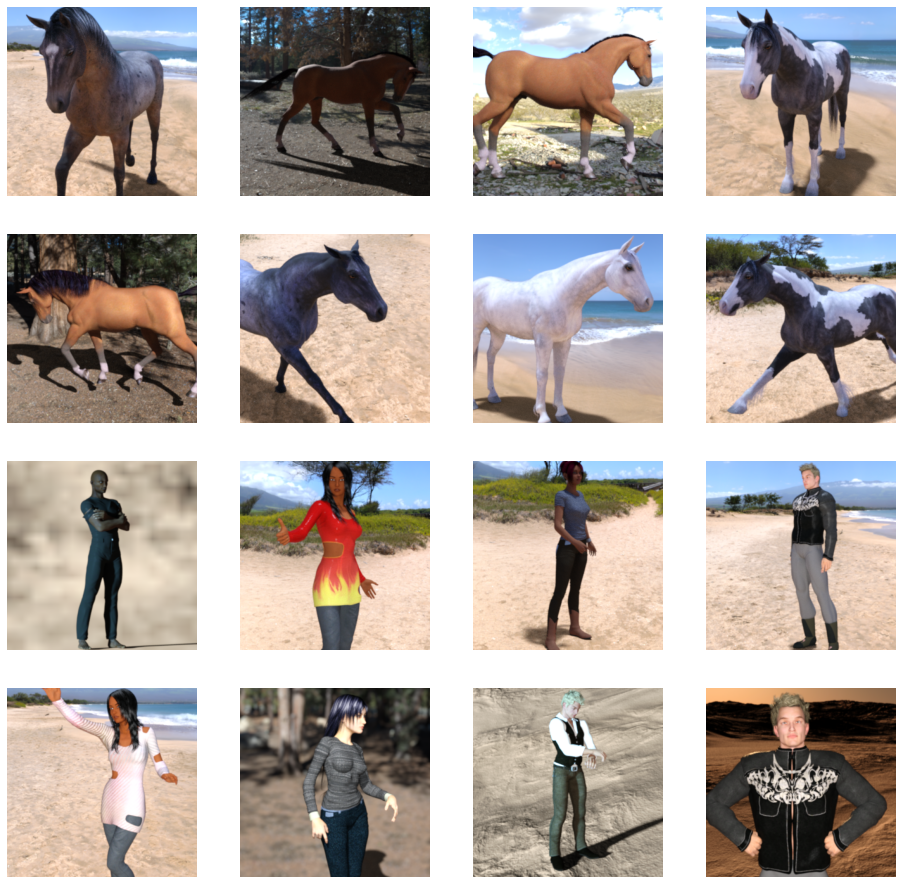

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8  # 8장씩 가져온다, 이 부분 때문에 셀을 재실행하면 새로운 batch 확인 가능 

# 이미지 전체 경로를 8개씩 리스트에 저장 
next_horse_pix = [os.path.join(train_horse_dir, fname) \
                  for fname in train_horse_names[pic_index-8:pic_index]] 
next_human_pix = [os.path.join(train_human_dir, fname) \
                  for fname in train_human_names[pic_index-8:pic_index]]
          
for i, img_path in enumerate(next_horse_pix + next_human_pix):  # 리스트 두개 더함, 말 다음에 사람 
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off')  # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Building a Small Model from Scratch

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 71, 71, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 33, 33, 32)       

stochastic gradient descent
:확률적 경사 하강법 

RMSprop 최적화 알고리즘은 확률적 경사 하강법을 선호, 학습률을 자동적으로 조정하기 때문 (adam 이나 adagrad도 마찬가지) 

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',   # 이진분류이고 sigmoid 함수 쓰기 때문 
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])


# Data Preprocessing

Let's set up data generators that will read pictures in our source folders, convert them to float32 tensors, and feed them (with their labels) to our network.

데이터 생성자 자체가 input으로 들어오는함수들에 의해 사용됨 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 이미지 생성자 생성 
train_datagen = ImageDataGenerator(rescale=1/255) #모든 이미지가 1/255로 rescale

train_generator = train_datagen.flow_from_directory(  # 디렉토리로부터의 flow 지정 
    '/tmp/horse-or-human/',
    target_size = (300,300),  # All images will be resized to 150x150?
    batch_size=128,
    class_mode='binary'   #binary crossentropy loss
)

history=model.fit(
    train_generator,    # 모델 학습 시 데이터가 아닌 데이터 생성자를 인자로 제공 
    steps_per_epoch=8,    # batch 사이즈에 맞게 값 지정 
    epochs=15,
    verbose=1     # 이 의미가 무엇인지 
)

Found 1027 images belonging to 2 classes.
Epoch 1/15
8/8 [==============================] - 7s 841ms/step - loss: 0.6876 - accuracy: 0.5173
Epoch 2/15
8/8 [==============================] - 6s 710ms/step - loss: 0.8461 - accuracy: 0.6956
Epoch 3/15
8/8 [==============================] - 6s 820ms/step - loss: 0.5039 - accuracy: 0.8249
Epoch 4/15
8/8 [==============================] - 6s 716ms/step - loss: 0.2857 - accuracy: 0.8771
Epoch 5/15
8/8 [==============================] - 6s 725ms/step - loss: 0.2386 - accuracy: 0.9079
Epoch 6/15
8/8 [==============================] - 6s 729ms/step - loss: 0.5611 - accuracy: 0.7415
Epoch 7/15
8/8 [==============================] - 6s 708ms/step - loss: 0.2430 - accuracy: 0.9027
Epoch 8/15
8/8 [==============================] - 6s 708ms/step - loss: 0.2624 - accuracy: 0.9059
Epoch 9/15
8/8 [==============================] - 6s 706ms/step - loss: 0.1824 - accuracy: 0.9346
Epoch 10/15
8/8 [==============================] - 6s 715ms/step - loss: 0.1

In [ ]:
import numpy as np
from google.colab import files 
from keras.preprocessing import image 

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0] > 0.5:
    print(fn + ' is a human')
  else:
    print(fn + ' is a horse')


# Visualizing Intermediate Representations

사실 중요한건 image generator 사용 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


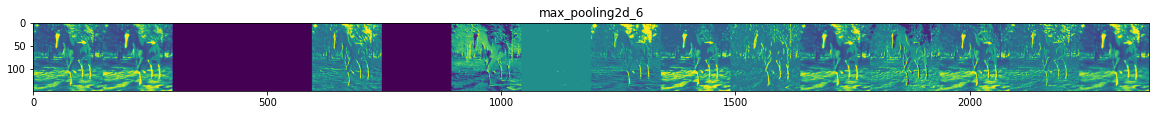

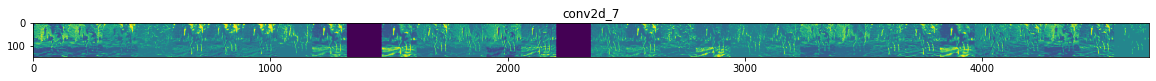

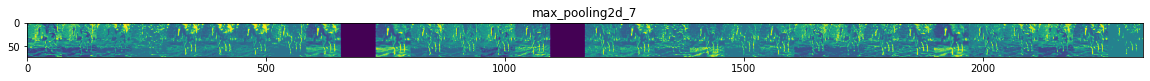

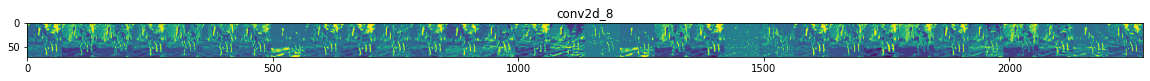

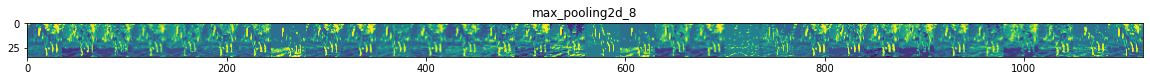

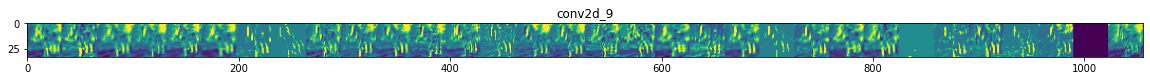

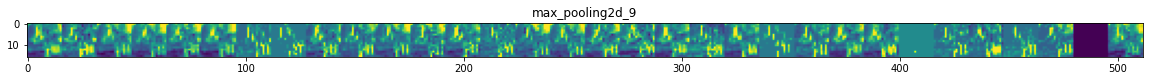

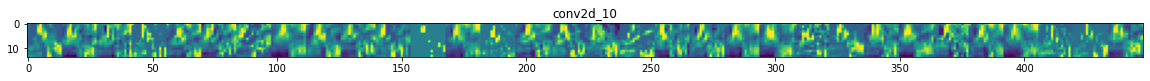

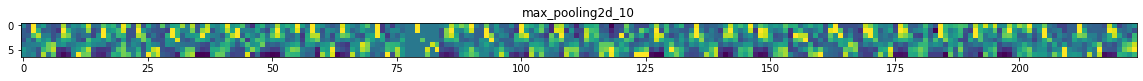

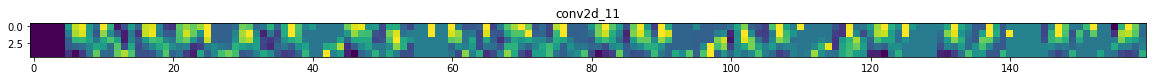

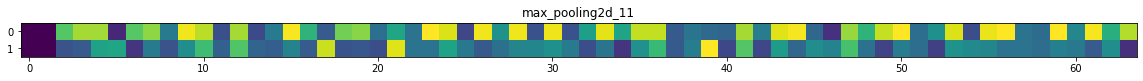

In [ ]:
import numpy as np
import random 
from tensorflow.keras.preprocessing.image import img_to_array, load_img 

# 모든 레이어를 거치는 과정을 시각화 
s_outputs = [layer.output for layer in model.layers[1:]]
visual_model = tf.keras.models.Model(inputs = model.input, outputs = s_outputs)

horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size = (300,300)) # this is PIL image 
x = img_to_array(img) # numpy array (150, 150, 3) 
x = x.reshape((1, ) + x.shape)  # (1, 150, 150, 3)

x /= 255

s_feature_maps = visual_model.predict(x)

layer_names = [layer.name for layer in model.layers[1:]]

for layer_name, feature_map in zip(layer_names, s_feature_maps):
  if len(feature_map.shape) == 4:
    n_features = feature_map.shape[-1]
    size = feature_map.shape[1]
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

